<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment-1.A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
car_data=pd.read_csv('fuel_consumption_dataset.csv')
car_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
car_data.isnull().sum()

,0
MODELYEAR,0
MAKE,0
MODEL,0
VEHICLECLASS,0
ENGINESIZE,0
CYLINDERS,0
TRANSMISSION,0
FUELTYPE,0
FUELCONSUMPTION_CITY,0
FUELCONSUMPTION_HWY,0


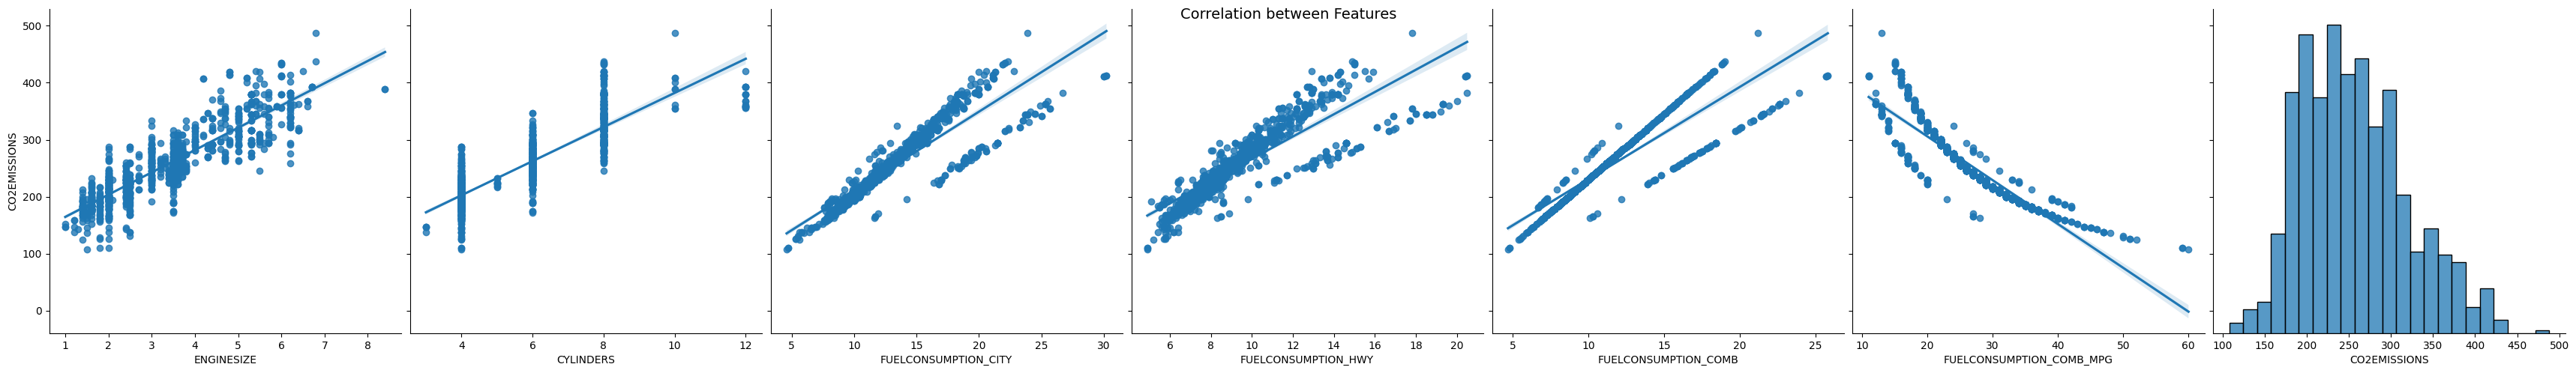

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    data=car_data,
    x_vars=['ENGINESIZE', 'CYLINDERS',
            'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
            'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG',
            'CO2EMISSIONS'],
    y_vars=['CO2EMISSIONS'],
    height=5,
    aspect=1,
    kind='reg'
)

plt.suptitle("Correlation between Features", fontsize=14)
plt.show()


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Separate numerical and categorical features
num_features = car_data.select_dtypes(include=np.number)
cat_features = car_data.select_dtypes(exclude=np.number)

# Create preprocessing pipeline
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features.columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features.columns)
    ]
)

# Split into features (X) and target (y)
X_processed = data_preprocessor.fit_transform(car_data)
y_target = car_data['CO2EMISSIONS']
X_processed.shape

(1067, 752)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_target, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree Regressor model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [19]:
y_pred=regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_predicted = regressor.predict(X_test)

# Evaluate model performance
print("R² Score:", r2_score(y_test, y_predicted))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predicted))
print("Mean Squared Error:", mean_squared_error(y_test, y_predicted))


R² Score: 0.9997219956802341
Mean Absolute Error: 0.2803738317757009
Mean Squared Error: 1.1495327102803738


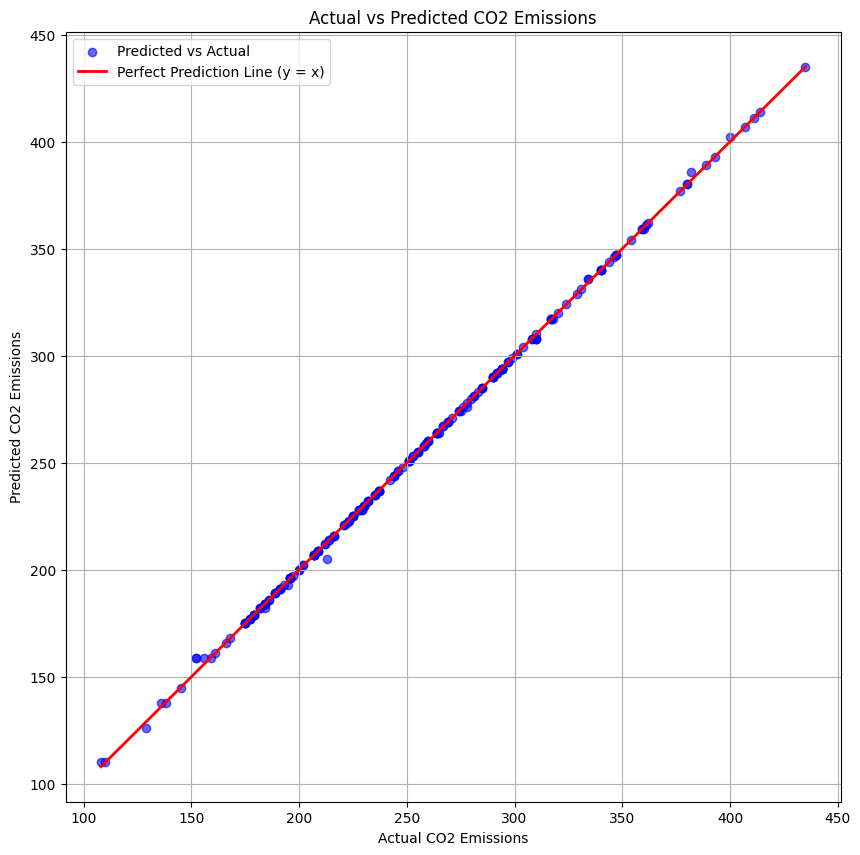

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Prediction Line (y = x)')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()